# Sample Mean and Variance
Computing mean and variance from a set of measurements from a laser scanner. A trolley on rails is standing at rest while the laser scanner measures the distance to the wall. Thus the variations in the measurements reflects the presicion of the laser scanner instrument.

![laserscan](laserscan.png)

In [1]:
from numpy import mean, std, sqrt, arange
import matplotlib.pyplot as plt

# Measurements
x = [51.34, 48.17, 49.02, 50.97, 51.23, 50.72, 48.95, 49.45, 52.07, 50.52] # [meter]

mu = mean(x)
sd = std(x)
se = sd/sqrt(len(x))

print("Estimated distance: %.2f m" % mu)
print("Standard deviation: %.2f m" % sd)
print("Standard error: %.2f m" % se)

Estimated distance: 50.24 m
Standard deviation: 1.20 m
Standard error: 0.38 m


## Recursive algorithm

$$
\begin{split}
  \bar{x}_N =& \frac{1}{N}\sum_{i=1}^N x_i \\
  &\vdots \\
  \bar{x}_n =& \bar{x}_{n - 1} + \frac{1}{n}(x_n - \bar{x}_{n - 1}) \\
\end{split}
$$

Measurement 01 -> estimated distance: 51.34 m
Measurement 02 -> estimated distance: 49.76 m
Measurement 03 -> estimated distance: 49.51 m
Measurement 04 -> estimated distance: 49.88 m
Measurement 05 -> estimated distance: 50.15 m
Measurement 06 -> estimated distance: 50.24 m
Measurement 07 -> estimated distance: 50.06 m
Measurement 08 -> estimated distance: 49.98 m
Measurement 09 -> estimated distance: 50.21 m
Measurement 10 -> estimated distance: 50.24 m


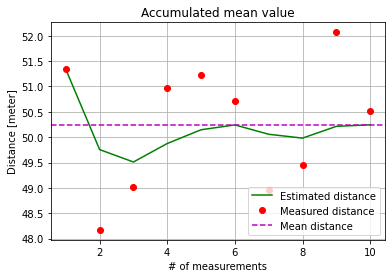

In [2]:
# Initial estimate
x_bar = x[0]

# Number of elements
N = len(x)

# Initialize plot vectors
x_all = []; meas_all = []

for n in range(0, N):
    x_bar = x_bar + 1/(n + 1)*(x[n] - x_bar)
    print("Measurement %02d -> estimated distance: %.2f m" % (n + 1, x_bar))
    
    # Accumulate plot vectors
    x_all.append(x_bar)
    meas_all.append(x[n])
    
# Define x-axis values
xn = arange(1, N + 1)

# Plot the results
plt.title("Accumulated mean value")
plt.plot(xn, x_all, color='g', label='Estimated distance')
plt.plot(xn, meas_all, color='r', marker='o', linestyle='none', label='Measured distance')
plt.axhline(y=x_bar, color='m', linestyle='--', label='Mean distance')
plt.xlabel('# of measurements')
plt.ylabel('Distance [meter]')
plt.legend(loc='lower right')
plt.grid()
plt.show()